### 載入工具

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### 資料：訓練集、標籤集

In [2]:
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot']
x = np.array(data)
print(x)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(x)
print('\ninteger_encoded\n', integer_encoded)
integer_encoded = integer_encoded[:, np.newaxis]
print('\ninteger_encoded\n', integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('\nonehot_encoded\n', onehot_encoded)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot']

integer_encoded
 [0 0 2 0 1 1]

integer_encoded
 [[0]
 [0]
 [2]
 [0]
 [1]
 [1]]

onehot_encoded
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


[[1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 0. 1. 2.]
 [1. 0. 0. 3.]
 [0. 1. 0. 4.]
 [0. 1. 0. 5.]]
(6, 4)


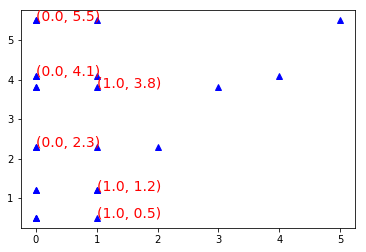

In [3]:
x_train = np.array([[0], [1], [2], [3], [4], [5]], np.float32)
x_train = np.hstack((onehot_encoded, x_train))
y_train = np.array([[0.5], [1.2], [2.3], [3.8], [4.1], [5.5]], np.float32)
print(x_train)
plt.figure()
plt.plot(x_train, y_train, "b^")
txt = [0, 1, 2, 3, 4, 5]
print(x_train.shape)
for i in range(x_train.shape[0]):
    plt.text(x_train[i][0], y_train[i][0], '(%.1f' % x_train[i][0] + ', %.1f)' % y_train[i][0], 
             fontdict={'size': 14, 'color': 'red'})


### 建構 Tensorflow 的 Graph

In [4]:
x = tf.placeholder(tf.float32, [None, 4])
y = tf.placeholder(tf.float32, [None, 1])

predict = tf.layers.dense(inputs=x, units=1)
loss = tf.losses.mean_squared_error(labels=y, predictions=predict)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

W0131 11:37:40.278349 4524852672 deprecation.py:323] From <ipython-input-4-bfd296ba2826>:4: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0131 11:37:40.281626 4524852672 deprecation.py:506] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1253: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 創建 Session、初始變數、開始訓練

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(500):
    c_ , _ = sess.run([loss, train], feed_dict={x:x_train, y:y_train})
    if step%50 == 0:
        print("loss: ", c_)

loss:  1.8881187
loss:  0.11264571
loss:  0.079868555
loss:  0.06170206
loss:  0.050280284
loss:  0.042664554
loss:  0.037441455
loss:  0.03379644
loss:  0.031214649
loss:  0.02935799


## 預測新資料

[[3.7031007]]


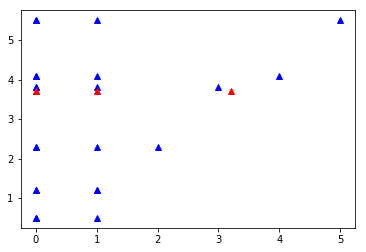

In [6]:
x_new = [[0,0,1,3.2]]
y_new = sess.run(predict, feed_dict={x:x_new})
print(y_new)

plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_new, y_new, "r^")
plt.show()